In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


in this data we have 158 rows and 12 columns inwhich both continuous and categorical columns are present and all data inwell manner

In [6]:
df.shape

(158, 12)

In [7]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [3]:
# the country columns is only name and is identity hence its not contribute to target hence dropping this columns
df.drop(['Country','Region'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 158 non-null    int64  
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 12.5 KB


in this data the 10 is continuous columns and two is object type 

In [4]:
df.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col) 

numerical columns: ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
we see that there is no null values present in each of columns and data is well manner
1) the mean value is slightly more than in 

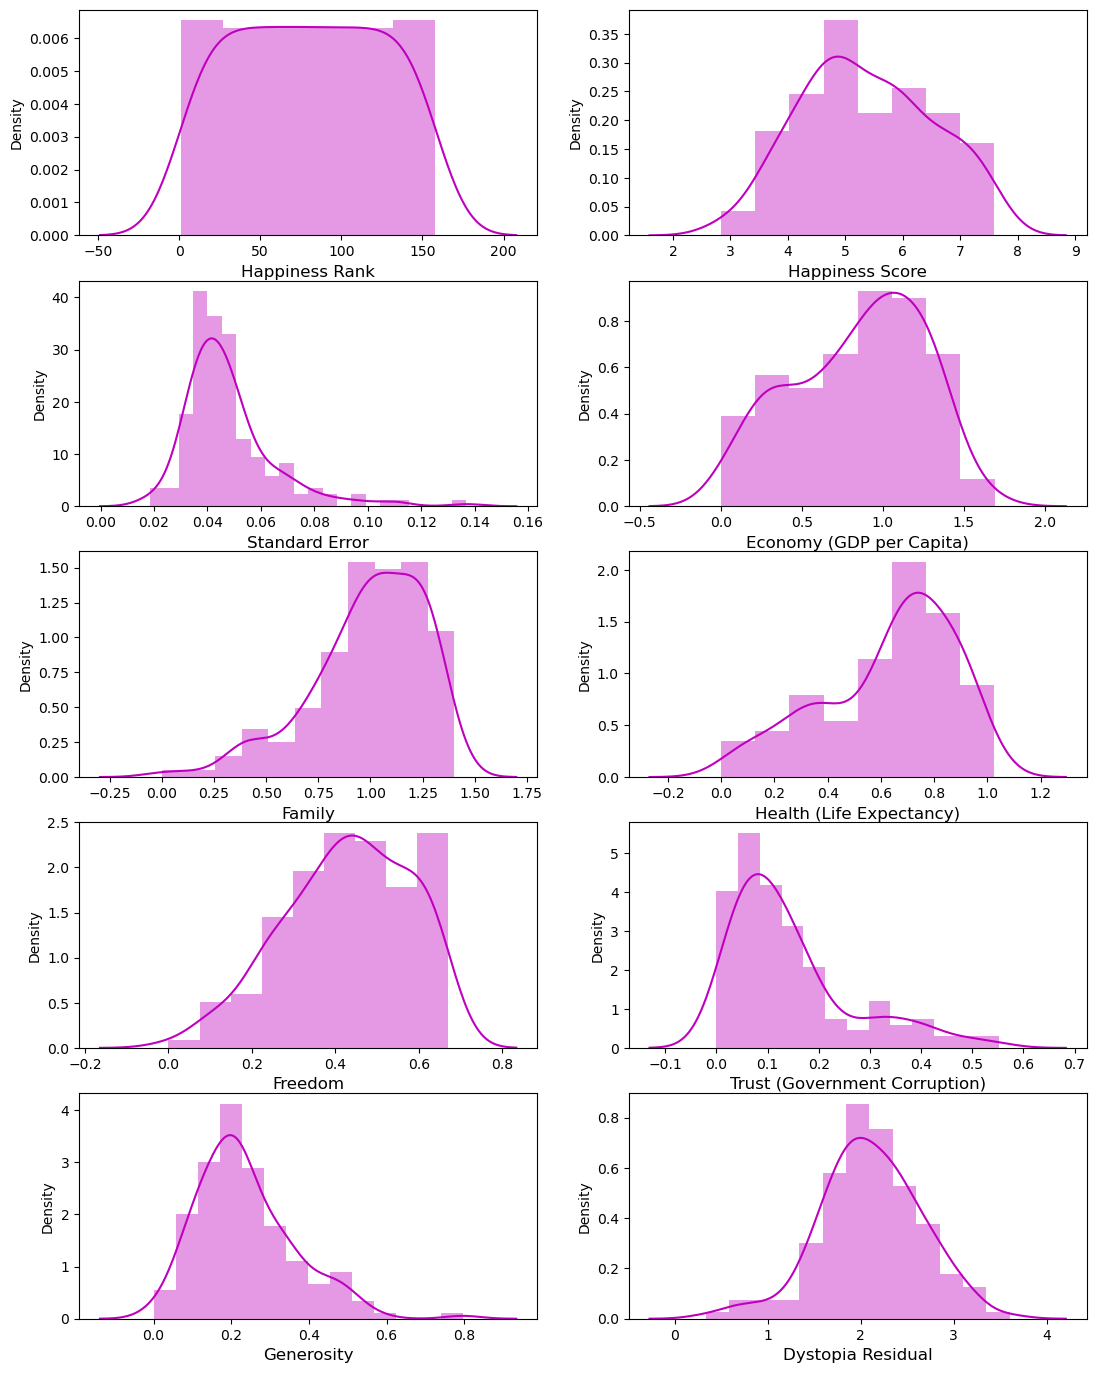

In [15]:
# lets check distribution of data in each of continuous columns
plt.figure(figsize=(13,17), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()    

we see that few coulmns has well shape curve and few are not in normally distributed hence we checking outliers for that columns

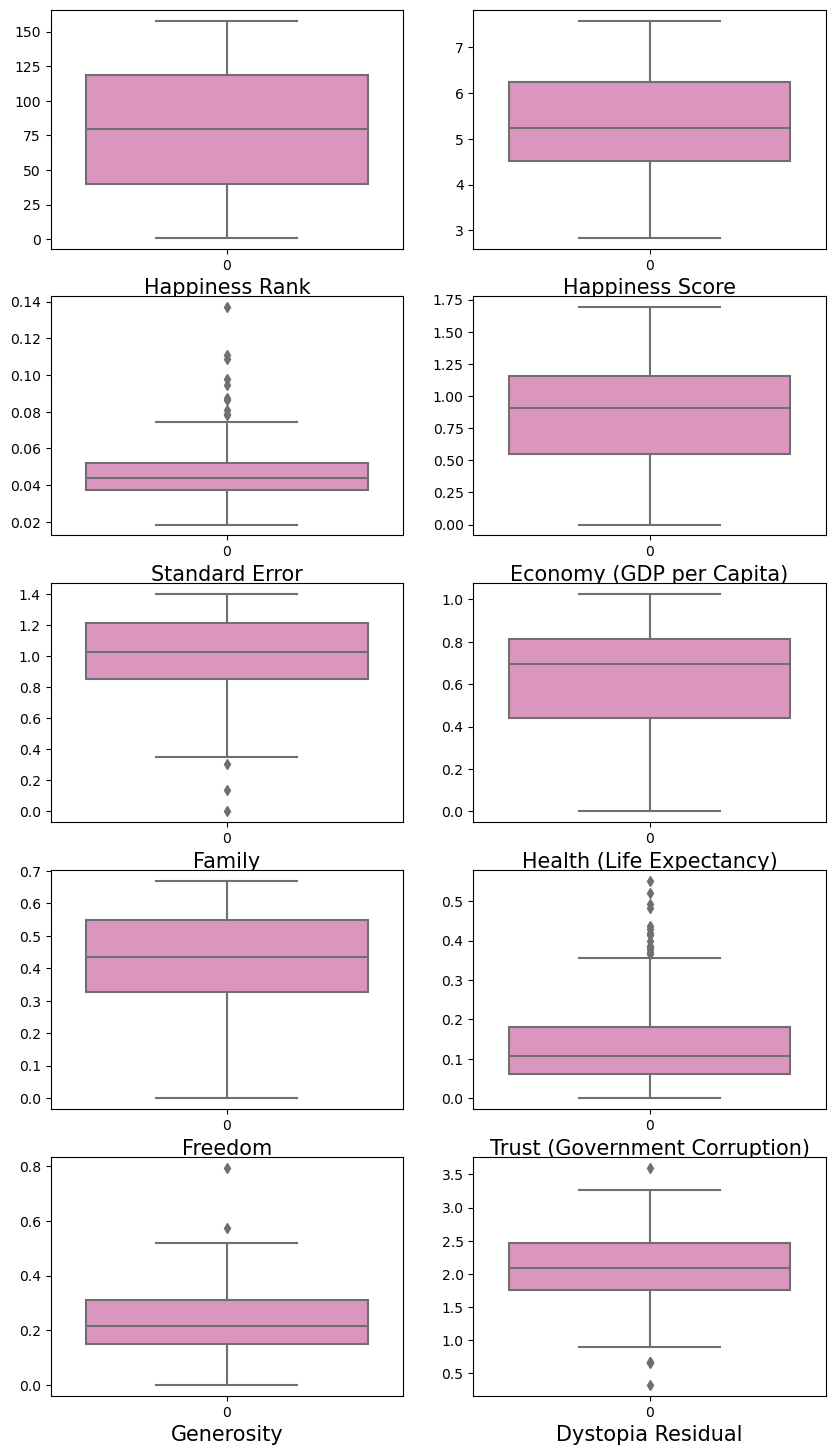

In [7]:
#lets check for outliers
plt.figure(figsize= (10,18), facecolor= 'white')
plotnumber= 1
for col in numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(5,2, plotnumber)
        sns.boxplot(df[col], palette= 'Set2_r')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()    

there isso many outliers in so many columns hence remove it by zscore method 

In [7]:
from scipy.stats import zscore

In [8]:
df.dtypes

Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [9]:
out_features = df[['Standard Error','Family','Trust (Government Corruption)','Generosity','Dystopia Residual']]
z= np.abs(zscore(out_features))
z

,Standard Error,Family,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.805926,1.320281,2.309652,0.471040,0.758258
1,0.055889,1.514458,0.016480,1.575856,1.092857
2,0.854487,1.361054,2.842774,0.824293,0.712335
3,0.531526,1.251922,1.852081,0.868638,0.663893
4,0.722845,1.221204,1.555725,1.748563,0.639337
...,...,...,...,...,...
153,0.774917,0.800520,3.413922,0.087228,2.588925
154,0.662582,2.346860,0.529210,0.433117,0.843967
155,0.132534,1.901086,0.381419,1.856891,3.208430
156,2.263962,2.118467,0.357715,0.316950,0.481985


In [10]:
#threshold=3
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([2, 0, 0, 0, 3, 1, 2, 4, 1], dtype=int64))

In [11]:
#now removing data above zscore and store in new dataframe
df1 = df[(z<3).all(axis=1)]
df1.shape

(149, 10)

In [12]:
#checking skewness of dataset
df1.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

lets remove skewed data from cube root square method

In [13]:
df1['Standard Error'] = np.cbrt(df1['Standard Error'])

df1['Trust (Government Corruption)'] = np.cbrt(df1['Trust (Government Corruption)'])


In [14]:
#again check skewness
df1.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [15]:
df1.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,77.617450,5.429611,0.355591,0.862163,1.008623,0.638624,0.427449,0.481452,0.231500,2.120862
std,44.854208,1.111256,0.034449,0.387975,0.251890,0.245937,0.150864,0.142146,0.119897,0.525654
min,1.000000,2.905000,0.264383,0.000000,0.302850,0.000000,0.000000,0.000000,0.000000,0.654290
25%,39.000000,4.610000,0.332621,0.593250,0.885880,0.467210,0.328180,0.394637,0.142720,1.792930
50%,78.000000,5.268000,0.351989,0.920490,1.035160,0.703800,0.434500,0.474938,0.213330,2.100170
75%,115.000000,6.295000,0.370090,1.159910,1.223930,0.814440,0.546040,0.559568,0.300300,2.465310
max,157.000000,7.587000,0.461216,1.563910,1.402230,1.025250,0.669730,0.789498,0.576300,3.602140


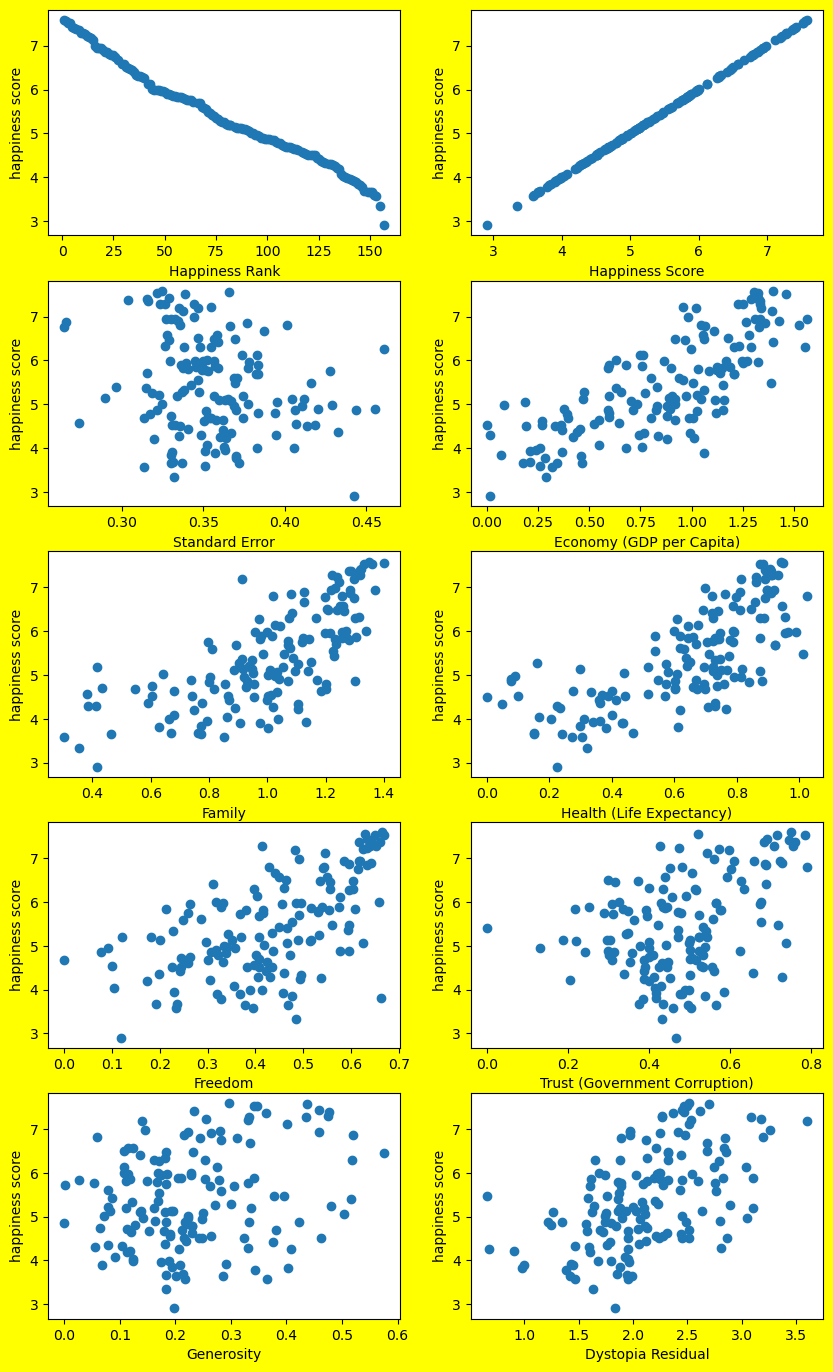

In [15]:
#lets observe the relation ship graph between independent anddependent variable 
plt.figure(figsize=(10,17),facecolor='yellow')
plotnumber=1

for column in df1:
    if plotnumber<=10:
        ax= plt.subplot(5,2,plotnumber)
        plt.scatter(df1[column],df1['Happiness Score'])
        plt.xlabel(column)
        plt.ylabel('happiness score')
    plotnumber+=1
plt.show()    

we have seethat most of columns are strongly contribute to happiness score because the positive proportion is shown beetween 
target and dependent variable gdp, freedom, trust are strongly relation with happiness score

In [16]:
# checking correlation between features and target variable
df1.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992921,0.219425,-0.773651,-0.720359,-0.736758,-0.571089,-0.365700,-0.225626,-0.526680
Happiness Score,-0.992921,1.000000,-0.237228,0.773577,0.720868,0.729191,0.585066,0.394775,0.250903,0.528334
Standard Error,0.219425,-0.237228,1.000000,-0.244856,-0.129305,-0.343251,-0.202292,-0.095125,-0.155298,0.028798
Economy (GDP per Capita),-0.773651,0.773577,-0.244856,1.000000,0.628589,0.817470,0.376780,0.231317,0.020730,0.026936
Family,-0.720359,0.720868,-0.129305,0.628589,1.000000,0.503890,0.474229,0.180054,0.154011,0.118062
Health (Life Expectancy),-0.736758,0.729191,-0.343251,0.817470,0.503890,1.000000,0.382595,0.158670,0.129328,0.031212
Freedom,-0.571089,0.585066,-0.202292,0.376780,0.474229,0.382595,1.000000,0.482062,0.428718,0.058596
Trust (Government Corruption),-0.365700,0.394775,-0.095125,0.231317,0.180054,0.158670,0.482062,1.000000,0.241413,0.107929
Generosity,-0.225626,0.250903,-0.155298,0.020730,0.154011,0.129328,0.428718,0.241413,1.000000,-0.034239
Dystopia Residual,-0.526680,0.528334,0.028798,0.026936,0.118062,0.031212,0.058596,0.107929,-0.034239,1.000000


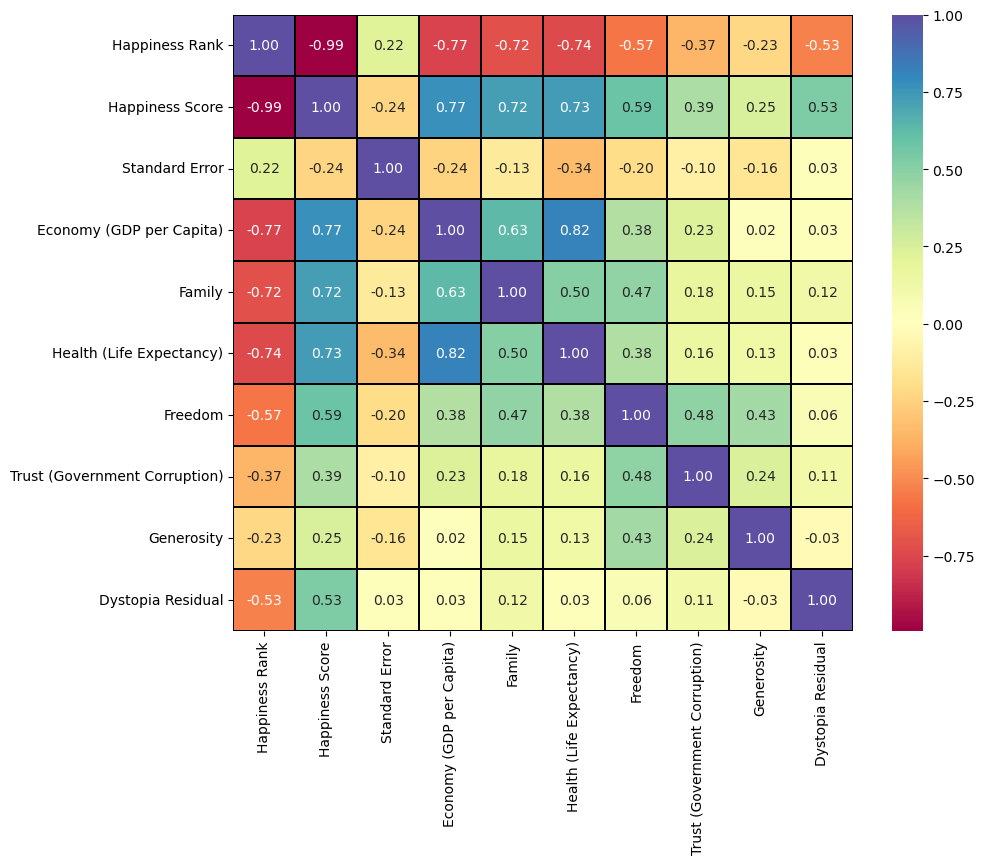

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'Spectral')
plt.show()

we notice some of columns are more positive correlation with target variable and some is negative correlation with that all is our isok
all is perfectly correlated to target variabl

In [16]:
# separate variblesin to two parts target and features x,y
x = df1.drop('Happiness Score',axis=1)
y = df1['Happiness Score']


In [17]:
print('feature dim.',x.shape)
print('target dim.',y.shape)

feature dim. (149, 9)
target dim. (149,)


In [18]:
#standardized our data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x.head()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738
1,2,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201
2,3,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.34139,2.49204
3,4,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531
4,5,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso, Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [20]:
#then come to model initializing and training
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc= r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs= i
print('best accuracy is', maxacc, 'at random state', maxrs)        

best accuracy is 0.9995270242212498 at random state 194


In [21]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= 194)

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
lr.score(x_train,y_train)

0.9988732673904521

In [22]:
lasso= Lasso()
lasso.fit(x_train,y_train)
predls= lasso.predict(x_test)
predls1= lasso.predict(x_train)
print('r2 score:\n',r2_score(y_test,predls))
print('r2 score on training data:\n', r2_score(y_train,predls1))


r2 score:
 0.9866082241972098
r2 score on training data:
 0.9837689254838294


In [23]:
knn= knn(n_neighbors=5)
knn.fit(x_train,y_train)
predknn= knn.predict(x_test)
predknn1= knn.predict(x_train)
print('r2 score:\n',r2_score(y_test,predknn))
print('r2 score on training data:\n', r2_score(y_train,predknn1))


r2 score:
 0.9979710143550895
r2 score on training data:
 0.9963776318720174


In [24]:
rfc= RandomForestRegressor()
rfc.fit(x_train,y_train)
predrfc= rfc.predict(x_test)
predrfc1= rfc.predict(x_train)
print('r2 score:\n',r2_score(y_test,predrfc))
print('r2 score on training data:\n', r2_score(y_train,predrfc1))


r2 score:
 0.9961113874660145
r2 score on training data:
 0.9989276340329686


In [25]:
ridge= Ridge()
ridge.fit(x_train,y_train)
predrd= ridge.predict(x_test)
predrd1= ridge.predict(x_train)
print('r2 score:\n',r2_score(y_test,predrd))
print('r2 score on training data:\n', r2_score(y_train,predrd1))


r2 score:
 0.9912830696254915
r2 score on training data:
 0.9902814875827012


In [39]:
svr= SVR()
svr.fit(x_train,y_train)
predsv= svr.predict(x_test)
predsv1= svr.predict(x_train)
print('r2 score:\n',r2_score(y_test,predsv))
print('r2 score on training data:\n', r2_score(y_train,predsv1))


r2 score:
 0.9931667411891085
r2 score on training data:
 0.9868229455064045


In [38]:
# for checking crossval score for our models
from sklearn.model_selection import cross_val_score

score= cross_val_score(rfc,x,y,cv=3)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,predrfc)-score.mean())*100)

[-2.71062667  0.07240533 -2.24053943]
mean : -1.626253588896389
differnce between r2 score and cross validation score is:
 262.23649763624036


In [37]:
score= cross_val_score(knn,x,y,cv=3)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,predknn)-score.mean())*100)

[-2.66854427  0.23968379 -2.18030448]
mean : -1.536388319592654
differnce between r2 score and cross validation score is:
 253.43593339477434


In [34]:
score= cross_val_score(lasso,x,y,cv=3)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,predls)-score.mean())*100)

[0.60771619 0.85348576 0.71569147]
mean : 0.7256311416908711
differnce between r2 score and cross validation score is:
 26.09770825063388


In [35]:
score= cross_val_score(ridge,x,y,cv=3)
print(score)
print('mean :',score.mean())
print('differnce between r2 score and cross validation score is:\n',(r2_score(y_test,predrd)-score.mean())*100)

[0.80348562 0.91705689 0.6316491 ]
mean : 0.7840638674683573
differnce between r2 score and cross validation score is:
 20.721920215713418


from  difference of both r2score and croos validationscore computed on r2 score we conclude ridge regression our best model

In [41]:
# for hyperperameter tuning on ridge model
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [44]:
ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [45]:
ridgecv.alpha_

0.001

In [46]:
final_modal= Ridge(alpha=0.001)
final_modal.fit(x_train,y_train)

Ridge(alpha=0.001)

In [47]:
final_modal.score(x_test,y_test)

0.9995271673679131

In [48]:
pred_=final_modal.predict(x_test)

In [49]:
print('r2 score of final modal:\n',r2_score(y_test,pred_))

r2 score of final modal:
 0.9995271673679131
